In [164]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# Data collection

In [165]:
Comfirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [166]:
comfirmed_csv = 'comfirmed_cases.csv'

In [167]:
urllib.request.urlretrieve(Comfirmed_url, 'comfirmed_cases.csv')

('comfirmed_cases.csv', <http.client.HTTPMessage at 0x3e512dfa90>)

In [168]:
df_CovidconfirmdG  = pd.read_csv(comfirmed_csv)

In [169]:
df_CovidconfirmdG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [170]:
df_CovidconfirmdG = df_CovidconfirmdG.dropna(axis=1)

In [171]:
df_CovidconfirmdG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [172]:
df_CovidconfirmdG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1144 entries, Country/Region to 3/9/23
dtypes: int64(1143), object(1)
memory usage: 2.5+ MB


In [173]:
df_CovidconfirmdG[['Country/Region']] = df_CovidconfirmdG[['Country/Region']].astype("string")

In [174]:
#Delete column with o value 
df_CovidconfirmdG = df_CovidconfirmdG.loc[:, (df_CovidconfirmdG != 0).any(axis=0)]

In [175]:
df_CovidconfirmdG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


# Load Recovered cases

In [176]:
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [177]:
recovered_csv = 'recovered_cases.csv'

In [178]:
urllib.request.urlretrieve(recovered_url, 'recovered_cases.csv')

('recovered_cases.csv', <http.client.HTTPMessage at 0x3e5ce6e310>)

In [179]:
df_CovidRecovdG = pd.read_csv(recovered_csv)

In [180]:
df_CovidRecovdG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
df_CovidRecovdG = df_CovidRecovdG.loc[:, (df_CovidRecovdG != 0).any(axis=0)]

In [182]:
df_CovidRecovdG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,82586,82586,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130291,130314,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117557,118409,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14348,14380,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,39389,39582,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,312289,312320,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4232,4251,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,189341,189658,0,0,0,0,0,0,0,0


In [183]:
df_CovidRecovdG = df_CovidRecovdG.dropna(axis=1)

In [184]:
df_CovidRecovdG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,82586,82586,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,130291,130314,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,117557,118409,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,14348,14380,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,39389,39582,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,312289,312320,0,0,0,0,0,0,0,0
270,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,Yemen,0,0,0,0,0,0,0,0,0,...,4232,4251,0,0,0,0,0,0,0,0
272,Zambia,0,0,0,0,0,0,0,0,0,...,189341,189658,0,0,0,0,0,0,0,0


In [185]:
df_CovidRecovdG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 570 entries, Country/Region to 9/20/22
dtypes: int64(569), object(1)
memory usage: 1.2+ MB


In [186]:
df_CovidRecovdG[['Country/Region']] = df_CovidRecovdG[['Country/Region']].astype("string")

# Load Death cases

In [187]:
death_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [188]:
death_csv = 'death_cases.csv'

In [189]:
urllib.request.urlretrieve(death_url, 'death_cases.csv')

('death_cases.csv', <http.client.HTTPMessage at 0x3e4fbae8d0>)

In [190]:
df_CoviddeathG = pd.read_csv(death_csv)

In [191]:
df_CoviddeathG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [192]:
#Delete column with o value 
df_CoviddeathG = df_CoviddeathG.loc[:, (df_CoviddeathG != 0).any(axis=0)]

In [193]:
df_CoviddeathG = df_CoviddeathG.dropna(axis=1)

In [194]:
df_CoviddeathG[['Country/Region']] = df_CoviddeathG[['Country/Region']].astype("string")

In [195]:
df_CoviddeathG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,Zambia,0,0,0,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [196]:
df_CoviddeathG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1144 entries, Country/Region to 3/9/23
dtypes: int64(1143), string(1)
memory usage: 2.5 MB


# Load External cases

In [197]:
external_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv'

In [198]:
external_csv = 'external_cases.csv'

In [199]:
urllib.request.urlretrieve(external_url, 'external_cases.csv')

('external_cases.csv', <http.client.HTTPMessage at 0x3e51373610>)

In [200]:
df_Covidexternal = pd.read_csv(external_csv)

In [201]:
df_Covidexternal

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [202]:
df_Covidexternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [203]:
#Delete column with o value 
df_Covidexternal = df_Covidexternal.loc[:, (df_Covidexternal != 0).any(axis=0)]

In [204]:
df_Covidexternal = df_Covidexternal.dropna(axis=1)

In [205]:
df_Covidexternal[['states', 'region']] = df_Covidexternal[['states', 'region']].astype("string")

In [206]:
df_Covidexternal[['Age', 'Health System', 'Acute IHR', 'Overall CCVI Index']] = df_Covidexternal[['Age', 'Health System', 'Acute IHR', 'Overall CCVI Index']].replace(',', '', regex=True).astype(int)

In [207]:
df_Covidexternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     string 
 1   region                   37 non-null     string 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     int32  
 4   Age                      37 non-null     int32  
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     int32  
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     int32  
dtypes: float64(5), int32(4), int64(1), string(2)
memory usage: 3.0 KB


# Load CovidNigeria cases

In [208]:
covid_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv'

In [209]:
covid_csv = 'covid_cases.csv'

In [210]:
urllib.request.urlretrieve(covid_url, 'covid_cases.csv')

('covid_cases.csv', <http.client.HTTPMessage at 0x3e5137f0d0>)

In [211]:
dfCovidNig= pd.read_csv(covid_csv)

In [212]:
dfCovidNig

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [213]:
#Delete column with o value 
dfCovidNig = dfCovidNig.loc[:, (dfCovidNig != 0).any(axis=0)]

In [214]:
#drop null value: NA
dfCovidNig = dfCovidNig.dropna(axis=1)

In [215]:
#convert to string
dfCovidNig[['States Affected']] = dfCovidNig[['States Affected']].astype("string")

In [216]:
dfCovidNig[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']] = dfCovidNig[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']].replace(',', '', regex=True).astype(int)



In [217]:
dfCovidNig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     string
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(3), int64(1), string(1)
memory usage: 1.1 KB


In [218]:
dfCovidNig

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


# Load Budget data

In [219]:
budget_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv'

In [220]:
budget_csv = 'budget_cases.csv'

In [221]:
urllib.request.urlretrieve(budget_url, 'budget_cases.csv')

('budget_cases.csv', <http.client.HTTPMessage at 0x3e66dbe310>)

In [222]:
dfBudget = pd.read_csv(budget_csv)


In [223]:
dfBudget

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [224]:
dfBudget[['states']] = dfBudget[['states']].astype("string")

In [225]:
dfBudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     string 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), string(1)
memory usage: 1020.0 bytes


# Load RealGDP data

In [226]:
realgdp_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv'

In [227]:
Realgdp_csv = 'Realgdp_cases.csv'

In [228]:
urllib.request.urlretrieve(realgdp_url, 'Realgdp_cases.csv')

('Realgdp_cases.csv', <http.client.HTTPMessage at 0x3e5139e710>)

In [229]:
dfRealgdp = pd.read_csv(Realgdp_csv)


In [230]:
dfRealgdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [231]:
dfRealgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 412.0 bytes


# Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [232]:
df_CovidconfirmdG.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [233]:
df_CovidconfirmdG.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,21.346021,28.501730,34.349481,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,211.628535,291.630499,345.759248,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,1.034435e+08,1.035339e+08,1.035898e+08,1.036487e+08,1.036508e+08,1.036470e+08,1.036555e+08,1.036909e+08,1.037558e+08,1.038027e+08


In [234]:
df_CovidconfirmdG.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1144)

In [235]:
df_CovidconfirmdG.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


# World Confirm cases

In [236]:
# applying groupby() function to
# group the data on Country/Region value.
ConfirmdCase = df_CovidconfirmdG.groupby('Country/Region')

In [237]:
ConfirmdCase

In [238]:
# print the first entries in all the groups formed.
ConfirmdCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


# National confirmed Covid19 cases

In [239]:
# Finding the values contained in the "Nigeria" group
ConfirmdCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [240]:
NGConfirmdCase = ConfirmdCase.get_group('Nigeria')

In [241]:
NGConfirmdCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [242]:
#Delete column with o value 
NGConfirmdCase = NGConfirmdCase.loc[:, (NGConfirmdCase != 0).any(axis=0)]

In [243]:
NGConfirmdCase

,Country/Region,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,1,1,1,1,1,1,1,1,1,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [244]:
NGConfirmdCase.columns

Index(['Country/Region', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1107)

In [245]:
NGConfirmdCase_transposed = NGConfirmdCase.transpose()

In [246]:
NGConfirmdCase_transposed.index.name = 'Date'

In [247]:
NGConfirmdCase_transposed = NGConfirmdCase_transposed.drop(index=NGConfirmdCase_transposed.index[0])

In [248]:
NGConfirmdCase_transposed

,206
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [249]:
df_NGConfirmdCase_transposed = NGConfirmdCase_transposed

In [250]:
df_NGConfirmdCase_transposed

,206
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [251]:
df_NGConfirmdCase_transposed.columns

Index([206], dtype='int64')

In [252]:
NGConfirmdCase_transposed.columns = ['Cases']

# Daily NAtional Covid19 confirmed cases

In [253]:
NGConfirmdCase_transposed

,Cases
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


# Recovered Cases

In [254]:
# applying groupby() function to
# group the data on 'Country/Region value.
RecoveredCase = df_CovidRecovdG.groupby('Country/Region')

# World Covid19 Recovered cases

In [255]:
# print the first entries in all the groups formed.
RecoveredCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,82586,82586,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,130291,130314,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,117557,118409,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,14348,14380,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,39389,39582,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,312289,312320,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,4232,4251,0,0,0,0,0,0,0,0


In [256]:
# Finding the values contained in the "Nigeria" group
RecoveredCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
191,Nigeria,0,0,0,0,0,0,0,0,0,...,165122,165208,0,0,0,0,0,0,0,0


In [257]:
dfRecoveredCase= RecoveredCase.get_group('Nigeria')

# National Covid19 Recovered cases

In [258]:
dfRecoveredCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
191,Nigeria,0,0,0,0,0,0,0,0,0,...,165122,165208,0,0,0,0,0,0,0,0


In [259]:
#Delete column with o value 
dfRecoveredCase = dfRecoveredCase.loc[:, (dfRecoveredCase != 0).any(axis=0)]

In [260]:
dfRecoveredCase

,Country/Region,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
191,Nigeria,1,1,1,1,2,2,2,2,2,...,164798,164837,164886,164930,164978,164994,165005,165037,165122,165208


In [261]:
dfRecoveredCase_transposed = dfRecoveredCase.transpose()

In [262]:
dfRecoveredCase.index.name = 'Date'

In [263]:
dfRecoveredCase_transposed = dfRecoveredCase_transposed.drop(index=dfRecoveredCase_transposed.index[0])

In [264]:
dfRecoveredCase_transposed.columns = ['Cases']

# Daily NAtional Recovered Covid19 cases

In [265]:
dfRecoveredCase_transposed

,Cases
3/18/20,1
3/19/20,1
3/20/20,1
3/21/20,1
3/22/20,2
...,...
7/31/21,164994
8/1/21,165005
8/2/21,165037
8/3/21,165122


# Deaths Cases

In [266]:
# applying groupby() function to
# group the data on 'Country/Region value.
DeathCase = df_CoviddeathG.groupby('Country/Region')

# World Covid19 Death cases

In [267]:
# print the first entries in all the groups formed.
DeathCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


In [268]:
# Finding the values contained in the "Nigeria" group
DeathCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [269]:
dfDeathCase = DeathCase.get_group('Nigeria')

# NAtional Covid19 Death cases

In [270]:
dfDeathCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [271]:
#Delete column with o value 
dfDeathCase = dfDeathCase.loc[:, (dfDeathCase != 0).any(axis=0)]

In [272]:
dfDeathCase

,Country/Region,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,1,1,1,1,1,1,1,2,2,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [273]:
dfDeathCase_transposed = dfDeathCase.transpose()

In [274]:
dfDeathCase_transposed.index.name = 'Date'

In [275]:
dfDeathCase_transposed = dfDeathCase_transposed.drop(index=dfDeathCase_transposed.index[0])

In [276]:
dfDeathCase_transposed.columns = ['Cases']

# Daily National Covid19 cases

In [277]:
dfDeathCase_transposed

,Cases
Date,
3/23/20,1
3/24/20,1
3/25/20,1
3/26/20,1
3/27/20,1
...,...
3/5/23,3155
3/6/23,3155
3/7/23,3155


# External

In [278]:
# applying groupby() function to
# group the data on states value.
Covid_ext = df_Covidexternal.groupby('states')

In [279]:
# print the first entries in all the groups formed.
Covid_ext.first()

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
states,,,,,,,,,,,
Abia,South East,4190000,0,0,0.6,0.1,0,0.9,0.2,0.0,1
Adamawa,North East,4672000,0,0,0.6,0.9,0,0.3,0.7,0.6,0
Akwa Ibom,South East,6093000,0,0,0.7,0.6,0,0.8,0.5,0.1,1
Anambra,South East,6050000,0,0,1.0,0.6,0,1.0,0.0,0.1,1
Bauchi,North East,7270000,0,0,0.2,0.8,0,0.2,0.8,0.8,0
Bayelsa,South South,2606000,0,0,0.6,0.1,0,0.5,0.2,0.7,1
Benue,North Central,6376000,0,0,0.5,0.7,0,0.4,0.3,0.5,0
Borno,North East,6651000,0,0,0.1,1.0,1,0.1,0.7,0.9,0
Cross river,South South,4272000,0,0,0.7,0.8,0,0.4,0.4,0.6,0


# Budget

In [280]:
# applying groupby() function to
# group the data on states value.
Covid_budget = dfBudget.groupby('states')

In [281]:
Covid_budget.first()

,Initial_budget (Bn),Revised_budget (Bn)
states,,
Abia,136.60,102.70
Adamawa,183.30,139.31
Akwa-Ibom,597.73,366.00
Anambra,137.10,112.80
Bauchi,167.20,128.00
Bayelsa,242.18,183.15
Benue,189.00,119.00
Borno,146.80,108.80
Cross River,1100.00,147.10

































# CovidNig

In [282]:
# applying groupby() function to
# group the data on states value.
Covid_Nig = dfCovidNig.groupby('States Affected')

In [283]:
Covid_Nig.first()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
States Affected,,,,
Abia,980,25,945,10
Adamawa,355,96,238,21
Akwa Ibom,395,44,342,9
Anambra,299,6,274,19
Bauchi,897,108,775,14
Bayelsa,497,55,421,21
Benue,515,44,460,11
Borno,778,37,705,36
Cross River,93,1,81,11


# Top 10 states for Covid_confirmed cases

In [284]:
top_10_confirmd = dfCovidNig.nlargest(10, 'No. of Cases (Lab Confirmed)')

In [285]:
top_10_confirmd 

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [286]:
top_10_confirmd

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [287]:
top_10_confirmd.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

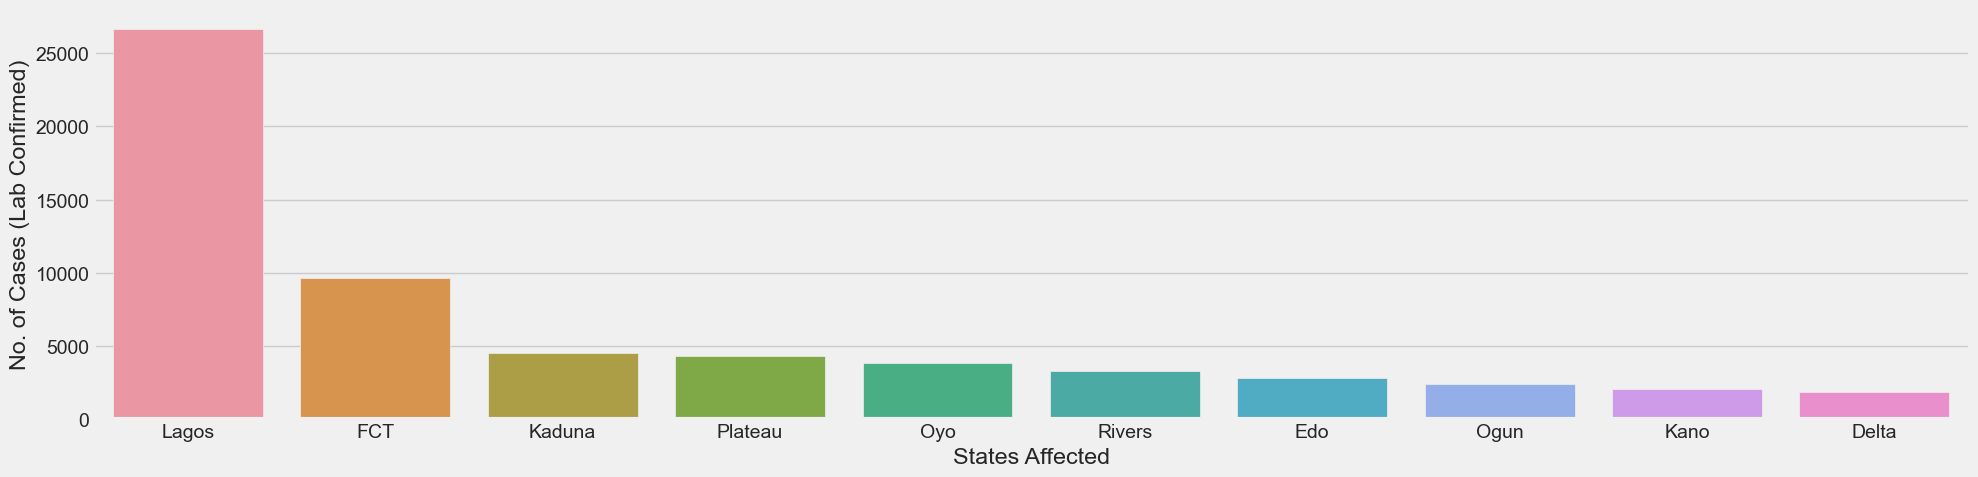

In [288]:
sns.catplot(kind = 'bar', data = top_10_confirmd, x = 'States Affected', y = 'No. of Cases (Lab Confirmed)', aspect = 4)

# Top 10  Discharged Covid cases.

In [289]:
top_10_Discharged = dfCovidNig.nlargest(10, 'No. Discharged')

In [290]:
top_10_Discharged

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
3,Plateau,4262,280,3948,34
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


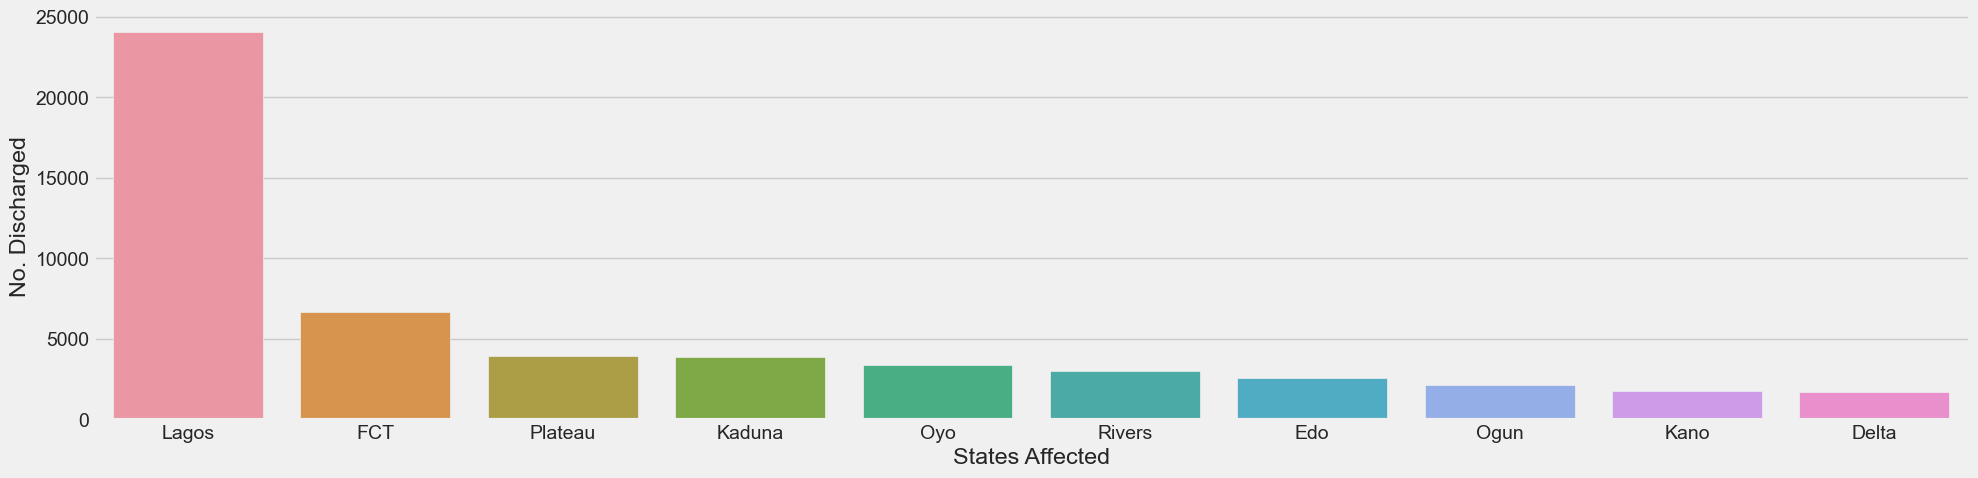

In [291]:
sns.catplot(kind = 'bar', data = top_10_Discharged, x = 'States Affected', y = 'No. Discharged', aspect = 4)

# top 10 Death cases

In [292]:
top_10_Death= dfCovidNig.nlargest(10, 'No. of Deaths')

In [293]:
top_10_Death

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
10,Ondo,1793,62,1690,41
19,Borno,778,37,705,36


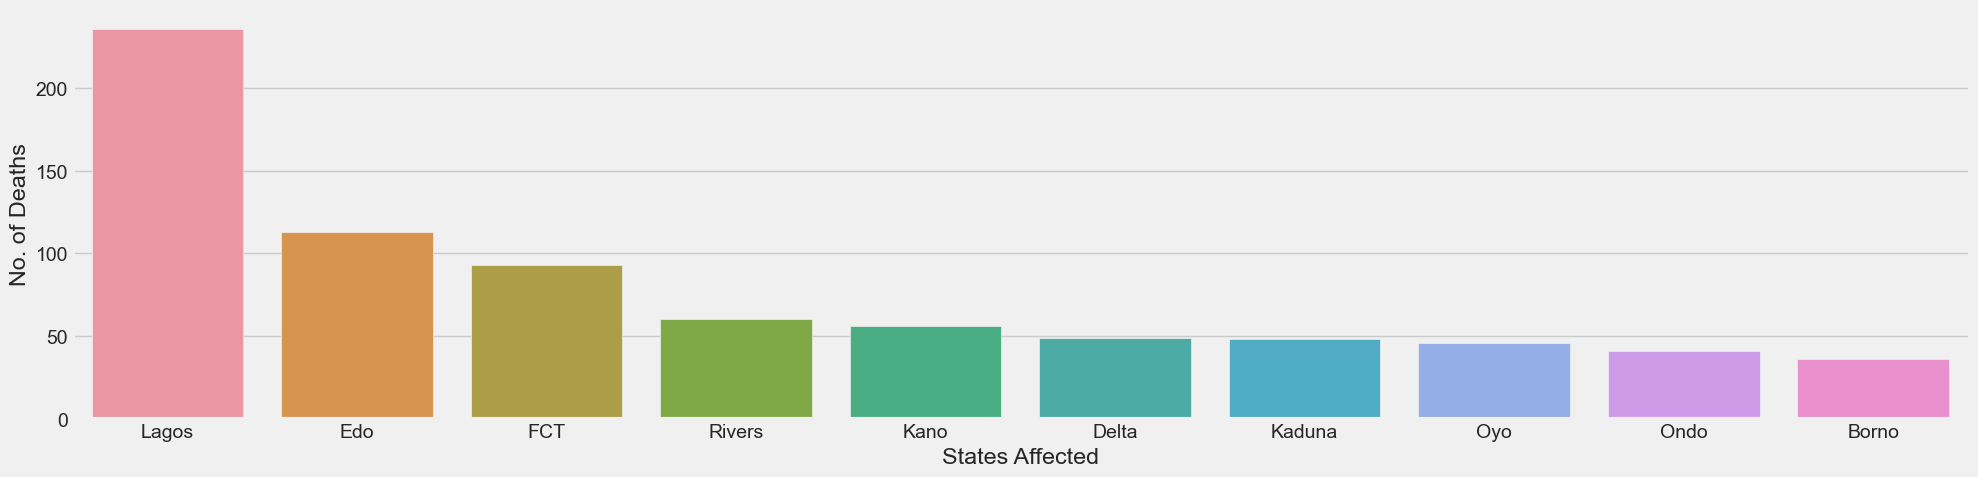

In [294]:
sns.catplot(kind = 'bar', data = top_10_Death, x = 'States Affected', y = 'No. of Deaths', aspect = 4)

# Plot for the total daily confirmed, recovered and death cases in Nigeria

In [295]:
NGConfirmdCase_transposed

,Cases
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [296]:
dfRecoveredCase_transposed

,Cases
3/18/20,1
3/19/20,1
3/20/20,1
3/21/20,1
3/22/20,2
...,...
7/31/21,164994
8/1/21,165005
8/2/21,165037
8/3/21,165122


In [297]:
dfDeathCase_transposed

,Cases
Date,
3/23/20,1
3/24/20,1
3/25/20,1
3/26/20,1
3/27/20,1
...,...
3/5/23,3155
3/6/23,3155
3/7/23,3155


# Combined Cases(Confirmed, Recovered & Death)

In [298]:
# combine the DataFrames vertically
dfcombined_Cases = pd.concat([NGConfirmdCase_transposed, dfRecoveredCase_transposed, dfDeathCase_transposed], axis=1)

In [299]:
dfcombined_Cases

,Cases,Cases,Cases
2/28/20,1,NaN,NaN
2/29/20,1,NaN,NaN
3/1/20,1,NaN,NaN
3/2/20,1,NaN,NaN
3/3/20,1,NaN,NaN
...,...,...,...
3/5/23,266598,NaN,3155
3/6/23,266598,NaN,3155
3/7/23,266598,NaN,3155
3/8/23,266598,NaN,3155


In [300]:
dfcombined_Cases = dfcombined_Cases.fillna(0)

In [301]:
dfcombined_Cases

,Cases,Cases,Cases
2/28/20,1,0,0
2/29/20,1,0,0
3/1/20,1,0,0
3/2/20,1,0,0
3/3/20,1,0,0
...,...,...,...
3/5/23,266598,0,3155
3/6/23,266598,0,3155
3/7/23,266598,0,3155
3/8/23,266598,0,3155


In [302]:
dfcombined_Cases.columns = ['Confirmed_Case', 'Recovered_Case', 'DeathCase_Case']

In [303]:
dfcombined_Cases

,Confirmed_Case,Recovered_Case,DeathCase_Case
2/28/20,1,0,0
2/29/20,1,0,0
3/1/20,1,0,0
3/2/20,1,0,0
3/3/20,1,0,0
...,...,...,...
3/5/23,266598,0,3155
3/6/23,266598,0,3155
3/7/23,266598,0,3155
3/8/23,266598,0,3155


In [304]:
dfcombined_Cases.columns

Index(['Confirmed_Case', 'Recovered_Case', 'DeathCase_Case'], dtype='object')

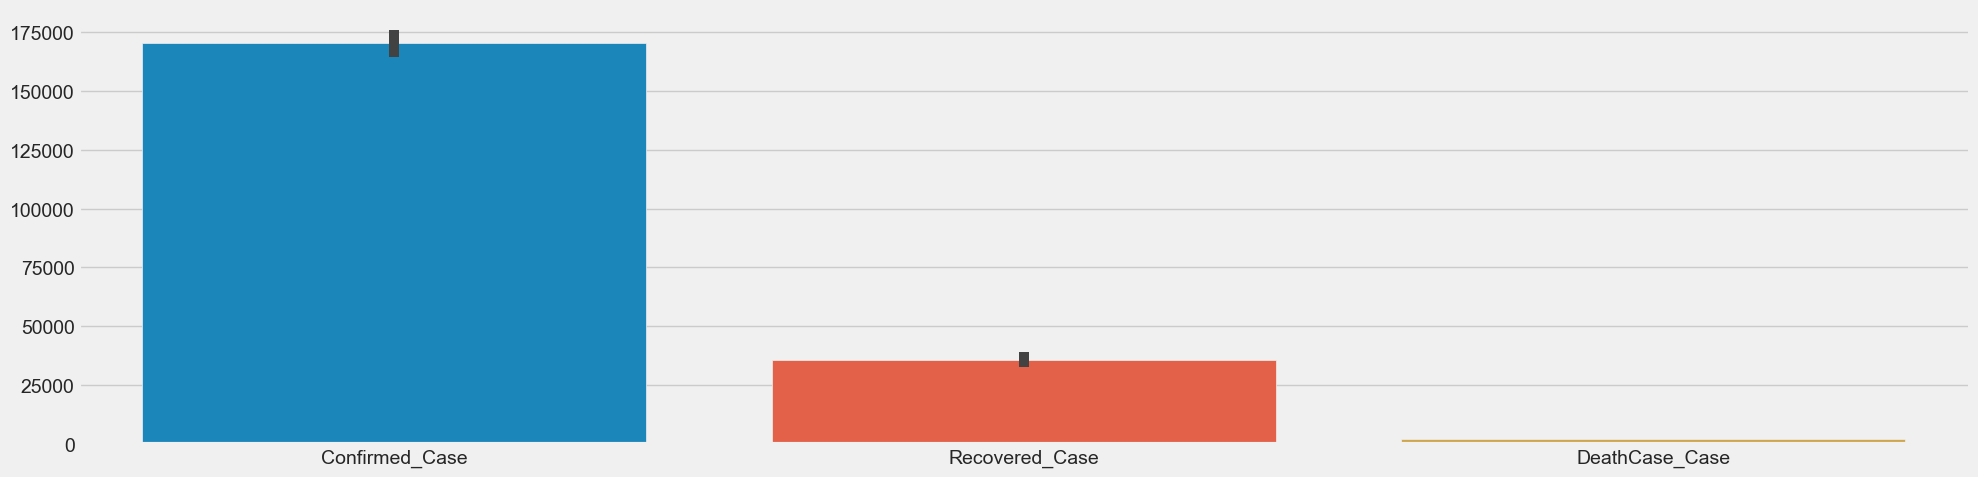

In [305]:
sns.catplot(kind = 'bar', data = dfcombined_Cases, aspect = 4)

# Determine the daily infection rate

In [306]:
NGConfirmdCase_transposed

,Cases
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [307]:
dfConfirmdCaseDiff = NGConfirmdCase_transposed.diff()

In [308]:
dfConfirmdCaseDiff

,Cases
Date,
2/28/20,NaN
2/29/20,0
3/1/20,0
3/2/20,0
3/3/20,0
...,...
3/5/23,0
3/6/23,0
3/7/23,0


In [309]:
dfConfirmdCaseDiff.reset_index(drop=False, inplace=True)

In [310]:
dfConfirmdCaseDiff.columns

Index(['Date', 'Cases'], dtype='object')

In [311]:
dfConfirmdCaseDiff

,Date,Cases
0,2/28/20,NaN
1,2/29/20,0
2,3/1/20,0
3,3/2/20,0
4,3/3/20,0
...,...,...
1101,3/5/23,0
1102,3/6/23,0
1103,3/7/23,0
1104,3/8/23,0


Text(0.5, 1.0, 'Daily Infection Cases')

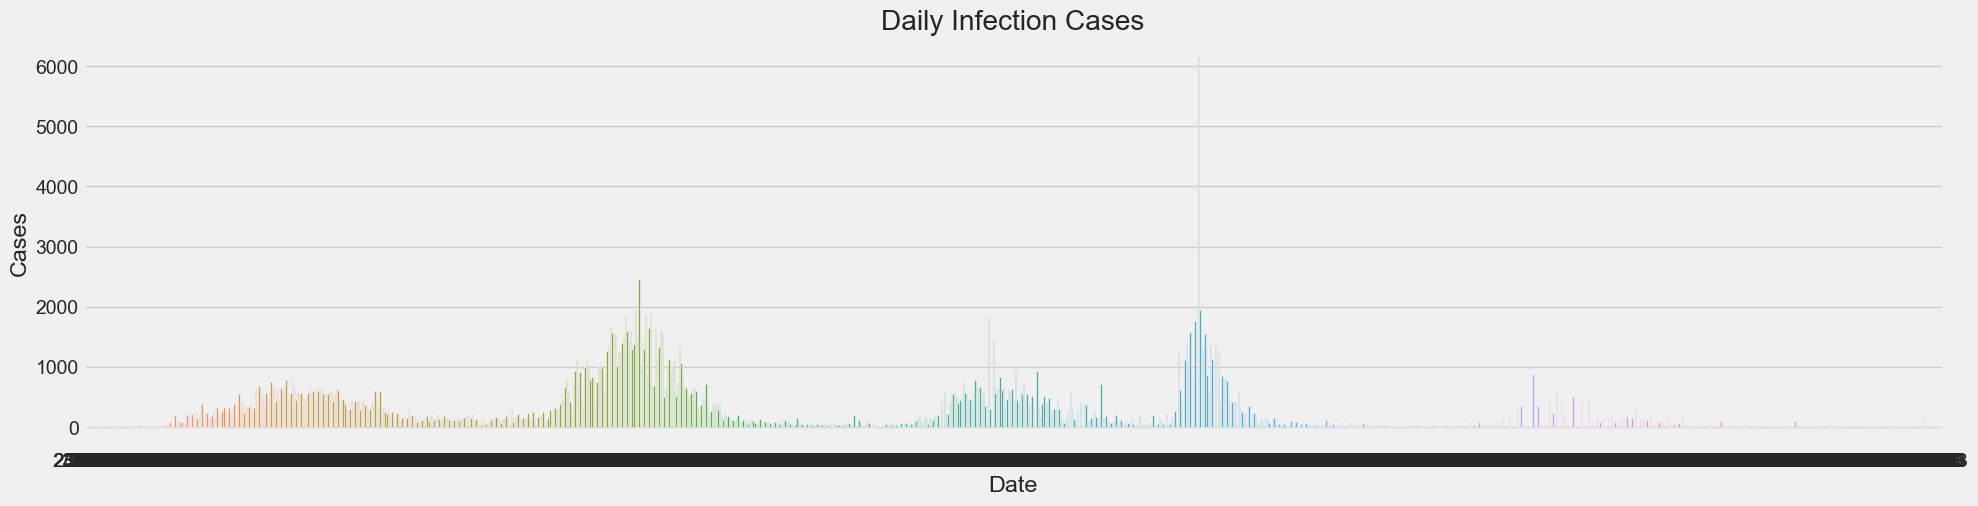

In [312]:
sns.catplot(kind = 'bar', data = dfConfirmdCaseDiff, x = 'Date', y = 'Cases', aspect = 4)
plt.title('Daily Infection Cases')

In [313]:
dfConfirmdCaseDiff

,Date,Cases
0,2/28/20,NaN
1,2/29/20,0
2,3/1/20,0
3,3/2/20,0
4,3/3/20,0
...,...,...
1101,3/5/23,0
1102,3/6/23,0
1103,3/7/23,0
1104,3/8/23,0


In [314]:
dfConfirmdCaseDiff

,Date,Cases
0,2/28/20,NaN
1,2/29/20,0
2,3/1/20,0
3,3/2/20,0
4,3/3/20,0
...,...,...
1101,3/5/23,0
1102,3/6/23,0
1103,3/7/23,0
1104,3/8/23,0


# Maximum Infection Rate

In [315]:
ConfirmdCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [316]:
dfConfirmdCase = ConfirmdCase.first()

In [317]:
dfConfirmdCase

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [318]:
dfConfirmdCasediff = dfConfirmdCase.diff()

In [319]:
dfConfirmdCasediff

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125069.0,125068.0,125050.0,125065.0,125058.0,125037.0,125021.0,124991.0,124992.0,125006.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-62950.0,-62960.0,-62945.0,-62958.0,-62958.0,-62950.0,-62950.0,-62937.0,-62949.0,-62961.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-223575.0,-223573.0,-223588.0,-223594.0,-223594.0,-223602.0,-223602.0,-223615.0,-223604.0,-223606.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57389.0,57402.0,57402.0,57402.0,57402.0,57402.0,57402.0,57402.0,57398.0,57398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-10823689.0,-10823698.0,-10823709.0,-10823722.0,-10823734.0,-10823738.0,-10823738.0,-10823758.0,-10823766.0,-10823766.0
Winter Olympics 2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0


In [320]:
# Calculate the maximum infection rate for each day
max_infection_rate = dfConfirmdCasediff.iloc[:, 1:].max(axis=1)

In [321]:
max_infection_rate

Country/Region
Afghanistan                  NaN
Albania                 136342.0
Algeria                  52524.0
Andorra                      0.0
Angola                   64891.0
                          ...   
West Bank and Gaza      301322.0
Winter Olympics 2022         0.0
Yemen                    11410.0
Zambia                  331190.0
Zimbabwe                     1.0
Length: 201, dtype: float64

In [322]:
# Get the maximum infection rate value
max_rate_value = max_infection_rate.max()

In [323]:
max_rate_value

103799897.0

In [324]:
date_of_max_infection = dfConfirmdCasediff.max().idxmax()

In [325]:
date_of_max_infection

'3/9/23'

# Relationship between Covid!9 and External data
Comfirm case Vs CCVI Index

In [326]:
df_Covidexternal.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
1,Plateau,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
2,Kwara,North Central,3524000,0,0,0.3,0.2,0,0.2,0.6,0.7,0
3,Nassarawa,North Central,2783000,0,0,0.5,0.9,0,0.1,0.6,0.5,0
4,Niger,North Central,6260000,0,0,0.6,0.3,0,0.1,0.8,0.8,0


In [327]:
dfCovidNig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [328]:
top_10_Covidexternal = df_Covidexternal.nlargest(10, 'Overall CCVI Index')

In [329]:
top_10_Covidexternal

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
8,Gombe,North East,3692000,1,0,0.4,0.9,0,0.3,0.8,0.7,0
11,Yobe,North East,3723000,1,0,0.3,1.0,0,0.0,0.9,1.0,0
0,FCT,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
1,Plateau,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
2,Kwara,North Central,3524000,0,0,0.3,0.2,0,0.2,0.6,0.7,0
3,Nassarawa,North Central,2783000,0,0,0.5,0.9,0,0.1,0.6,0.5,0
4,Niger,North Central,6260000,0,0,0.6,0.3,0,0.1,0.8,0.8,0
5,Benue,North Central,6376000,0,0,0.5,0.7,0,0.4,0.3,0.5,0
6,Kogi,North Central,4970000,0,0,0.2,0.5,0,0.4,0.3,0.6,0
7,Bauchi,North East,7270000,0,0,0.2,0.8,0,0.2,0.8,0.8,0


In [330]:
top_10_Covidexternal.reset_index(drop=True, inplace=True)

In [331]:
top_10_Covidexternal

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Gombe,North East,3692000,1,0,0.4,0.9,0,0.3,0.8,0.7,0
1,Yobe,North East,3723000,1,0,0.3,1.0,0,0.0,0.9,1.0,0
2,FCT,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
3,Plateau,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
4,Kwara,North Central,3524000,0,0,0.3,0.2,0,0.2,0.6,0.7,0
5,Nassarawa,North Central,2783000,0,0,0.5,0.9,0,0.1,0.6,0.5,0
6,Niger,North Central,6260000,0,0,0.6,0.3,0,0.1,0.8,0.8,0
7,Benue,North Central,6376000,0,0,0.5,0.7,0,0.4,0.3,0.5,0
8,Kogi,North Central,4970000,0,0,0.2,0.5,0,0.4,0.3,0.6,0
9,Bauchi,North East,7270000,0,0,0.2,0.8,0,0.2,0.8,0.8,0


In [332]:
#change the column name to match the other dataset
dfCovidNig.rename(columns={'States Affected': 'states'}, inplace=True)

In [333]:
dfCovidNig

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [334]:
top_10_CovidNig= dfCovidNig.nlargest(10, 'No. of Cases (Lab Confirmed)') 

In [335]:
top_10_CovidNig

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [336]:
# merge both datasets using their common column name
merged_top10 = pd.merge(dfCovidNig, top_10_Covidexternal, on='states')

In [337]:
merged_top10

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,9627,2840,6694,93,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
1,Plateau,4262,280,3948,34,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
2,Kwara,1296,171,1094,31,North Central,3524000,0,0,0.3,0.2,0,0.2,0.6,0.7,0
3,Gombe,1164,183,950,31,North East,3692000,1,0,0.4,0.9,0,0.3,0.8,0.7,0
4,Bauchi,897,108,775,14,North East,7270000,0,0,0.2,0.8,0,0.2,0.8,0.8,0
5,Benue,515,44,460,11,North Central,6376000,0,0,0.5,0.7,0,0.4,0.3,0.5,0
6,Niger,381,69,300,12,North Central,6260000,0,0,0.6,0.3,0,0.1,0.8,0.8,0
7,Yobe,164,33,123,8,North East,3723000,1,0,0.3,1.0,0,0.0,0.9,1.0,0
8,Kogi,5,0,3,2,North Central,4970000,0,0,0.2,0.5,0,0.4,0.3,0.6,0


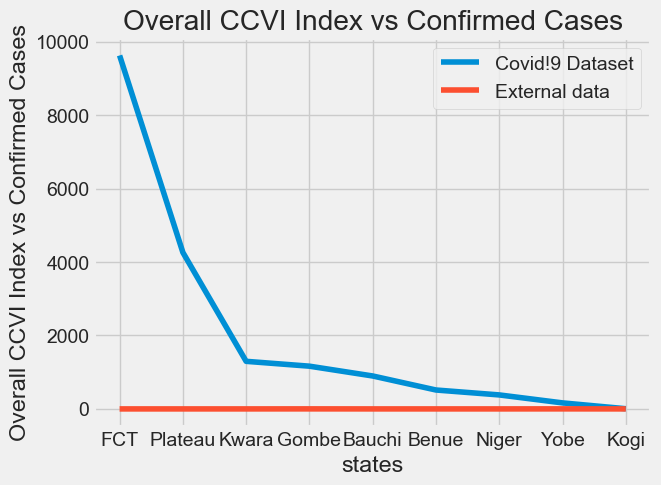

In [338]:
#Line plot
plt.plot(merged_top10['states'], merged_top10['No. of Cases (Lab Confirmed)'], label='Covid!9 Dataset')
plt.plot(merged_top10['states'], merged_top10['Overall CCVI Index'], label='External data')
plt.xlabel('states')
plt.ylabel('Overall CCVI Index vs Confirmed Cases')
plt.title('Overall CCVI Index vs Confirmed Cases')
plt.legend()

In [339]:
top_10_PopulationDensity = df_Covidexternal.nlargest(10, 'Population Density')

In [340]:
top_10_PopulationDensity

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
24,Anambra,South East,6050000,0,0,1.0,0.6,0,1.0,0.0,0.1,1
31,Lagos,South West,13992000,0,0,1.0,0.3,0,1.0,0.1,0.4,0
0,FCT,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
20,Imo,South East,6018000,0,1,0.9,0.0,0,0.9,0.4,0.0,1
21,Abia,South East,4190000,0,0,0.6,0.1,0,0.9,0.2,0.0,1
26,Rivers,South South,7763000,0,0,0.9,0.6,0,0.9,0.1,0.1,1
13,Kano,North West,14726000,0,0,0.1,0.3,0,0.8,0.8,0.5,0
23,Akwa Ibom,South East,6093000,0,0,0.7,0.6,0,0.8,0.5,0.1,1
35,Osun,South West,5252000,0,0,0.4,0.4,0,0.8,0.1,0.2,1
36,Ekiti,South West,3593000,0,0,0.3,0.5,0,0.8,0.1,0.4,1


In [341]:
merged_top10Density = pd.merge(dfCovidNig, top_10_PopulationDensity, on='states')

In [342]:
merged_top10Density

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708,2435,24037,236,South West,13992000,0,0,1.0,0.3,0,1.0,0.1,0.4,0
1,FCT,9627,2840,6694,93,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
2,Rivers,3279,232,2987,60,South South,7763000,0,0,0.9,0.6,0,0.9,0.1,0.1,1
3,Kano,2032,198,1778,56,North West,14726000,0,0,0.1,0.3,0,0.8,0.8,0.5,0
4,Abia,980,25,945,10,South East,4190000,0,0,0.6,0.1,0,0.9,0.2,0.0,1
5,Osun,979,20,937,22,South West,5252000,0,0,0.4,0.4,0,0.8,0.1,0.2,1
6,Imo,734,61,661,12,South East,6018000,0,1,0.9,0.0,0,0.9,0.4,0.0,1
7,Ekiti,405,24,375,6,South West,3593000,0,0,0.3,0.5,0,0.8,0.1,0.4,1
8,Akwa Ibom,395,44,342,9,South East,6093000,0,0,0.7,0.6,0,0.8,0.5,0.1,1
9,Anambra,299,6,274,19,South East,6050000,0,0,1.0,0.6,0,1.0,0.0,0.1,1


# Regression Plot

Text(0.5, 1.0, 'Regression Plot: Population Density vs. No. of Cases (Lab Confirmed)')

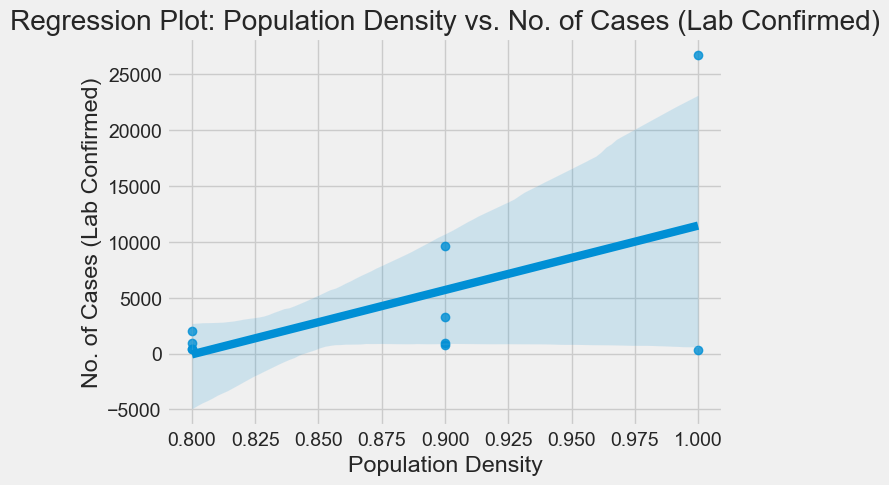

In [343]:
# Generate a regression plot
sns.regplot(x='Population Density', y='No. of Cases (Lab Confirmed)', data=merged_top10Density)

# Add labels and title
plt.xlabel('Population Density')
plt.ylabel('No. of Cases (Lab Confirmed)')
plt.title('Regression Plot: Population Density vs. No. of Cases (Lab Confirmed)')


In [344]:
dfRealgdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [345]:
pre_covid_gdp = dfRealgdp[(dfRealgdp['Year'] >= 2014) & (dfRealgdp['Year'] <= 2019)].sum().sum()

In [346]:
pre_covid_gdp

413801074.72

In [347]:
q2_2020_gdp = dfRealgdp[dfRealgdp['Year'] == 2020]['Q2'].iloc[0]

In [348]:
q2_2020_gdp

15890000.0

In [349]:
percentage_change = ((pre_covid_gdp - q2_2020_gdp)/pre_covid_gdp)*100

In [350]:
percentage_change

96.15999064024857

In [351]:
# Check if dfRealgdp is a Series
if isinstance(dfRealgdp, pd.Series):
    # Convert the Series to DataFrame with 'Year' as a new column
    dfRealgdp1 = dfRealgdp.reset_index()

In [352]:
dfRealgdp.columns

Index(['Year', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

In [353]:
# Set 'Year' column as the index for easier plotting
dfRealgdp.set_index('Year', inplace=True)

In [354]:
dfRealgdp

,Q1,Q2,Q3,Q4
Year,,,,
2014,15438679.50,16084622.31,17479127.58,18150356.45
2015,16050601.38,16463341.91,17976234.59,18533752.07
2016,15943714.54,16218542.41,17555441.69,18213537.29
2017,15797965.83,16334719.27,17760228.17,18598067.07
2018,16096654.19,16580508.07,18081342.10,19041437.59
2019,16434552.65,16931434.89,18494114.17,19530000.00
2020,16740000.00,15890000.00,17820000.00,0.00


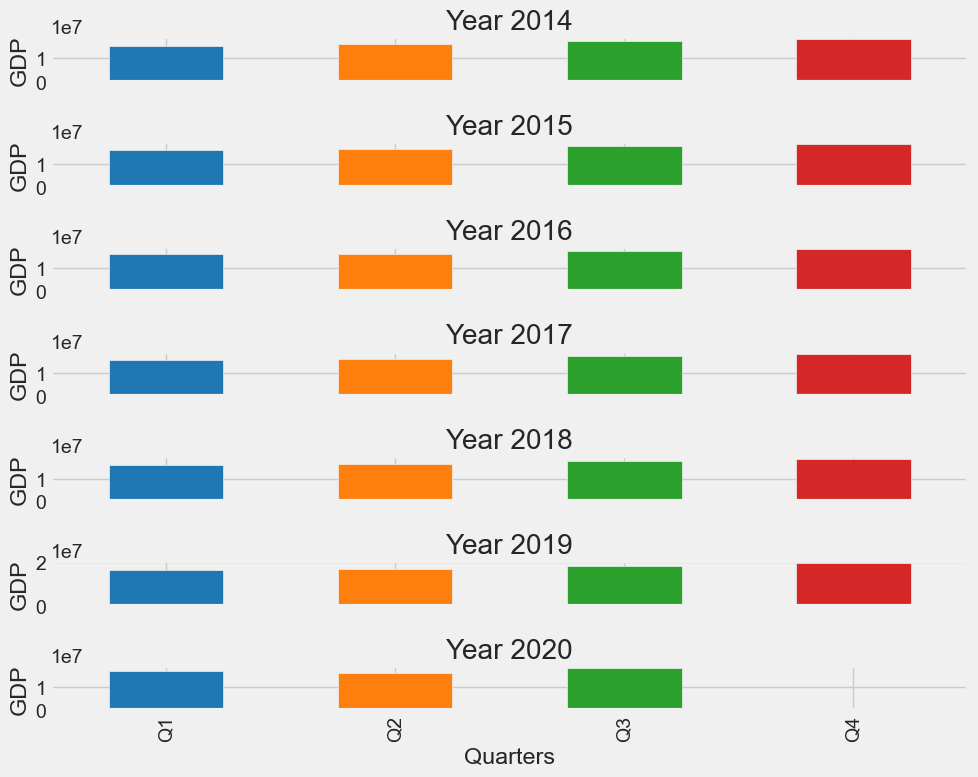

In [355]:
# Plot the bar chart
fig, axes = plt.subplots(nrows=len(dfRealgdp.index), ncols=1, figsize=(10, 8), sharex=True)
for i, year in enumerate(dfRealgdp.index):
    dfRealgdp.loc[year].plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    axes[i].set_ylabel('GDP')
    axes[i].set_title(f'Year {year}')
plt.xlabel('Quarters')

# Adjust the layout
plt.tight_layout()


In [356]:
dfBudget

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


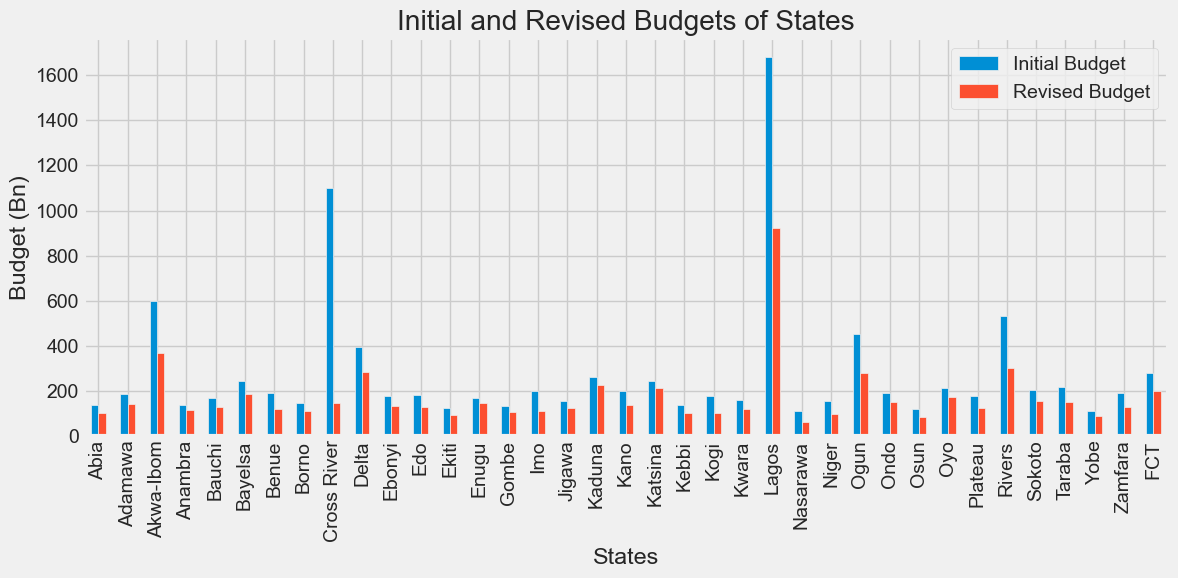

In [357]:
# Plot the bar chart for Initial and Revised Budgets
dfBudget.plot(x='states', y=['Initial_budget (Bn)', 'Revised_budget (Bn)'], kind='bar', figsize=(12, 6))
plt.xlabel('States')
plt.ylabel('Budget (Bn)')
plt.title('Initial and Revised Budgets of States')
plt.xticks(rotation=90)
plt.legend(['Initial Budget', 'Revised Budget'])
plt.tight_layout()